In [27]:
import pandas as pd
# import numpy as np
import matplotlib.pyplot as plt
import requests as r
import datetime

In [28]:
file = "Resources/new_york_city_data.csv"
raw_data = pd.read_csv(file, low_memory=False)
raw_data.head()

,STATION,NAME,DATE,AWND,AWND_ATTRIBUTES,PRCP,PRCP_ATTRIBUTES,PSUN,PSUN_ATTRIBUTES,SNWD,...,TAVG,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES,TOBS,TOBS_ATTRIBUTES,TSUN,TSUN_ATTRIBUTES
0,US1NYWC0003,"WHITE PLAINS 3.1 NNW, NY US",2016-06-01,NaN,NaN,0.0,",,N",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,US1NYWC0003,"WHITE PLAINS 3.1 NNW, NY US",2016-06-02,NaN,NaN,0.0,",,N",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,US1NYWC0003,"WHITE PLAINS 3.1 NNW, NY US",2016-06-03,NaN,NaN,0.0,",,N",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,US1NYWC0003,"WHITE PLAINS 3.1 NNW, NY US",2016-06-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,US1NYWC0003,"WHITE PLAINS 3.1 NNW, NY US",2016-06-07,NaN,NaN,0.0,",,N",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
data_columns = raw_data[["DATE", "AWND", "PRCP", "TAVG", "TMAX", "TMIN"]]
data_columns

,DATE,AWND,PRCP,TAVG,TMAX,TMIN
0,2016-06-01,NaN,0.0,NaN,NaN,NaN
1,2016-06-02,NaN,0.0,NaN,NaN,NaN
2,2016-06-03,NaN,0.0,NaN,NaN,NaN
3,2016-06-06,NaN,NaN,NaN,NaN,NaN
4,2016-06-07,NaN,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...
104146,2019-12-27,1.4,0.0,NaN,11.7,5.0
104147,2019-12-28,1.2,0.0,NaN,11.1,0.0
104148,2019-12-29,1.9,4.3,NaN,6.7,-2.1
104149,2019-12-30,4.8,18.0,NaN,5.6,3.9


In [30]:
data_columns.dropna(inplace=True)

C:\Users\AU0006AU\AppData\Local\Continuum\anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [31]:
data_columns.to_csv("export.csv")

# Linear Regression Model

In [32]:
X = data_columns[["AWND", "PRCP", "TMAX", "TMIN"]]
# X = data_columns[["TMAX", "TMIN", "TOBS"]]

y = data_columns[["TAVG"]].values.reshape(-1, 1)
print(X.shape, y.shape)

(3926, 4) (3926, 1)


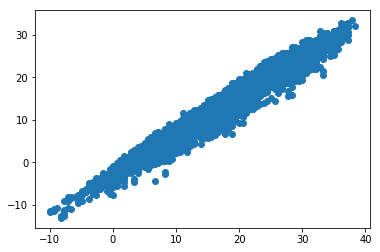

In [33]:
plt.scatter(X["TMAX"], y)
plt.savefig("Images/tmax_scatter")

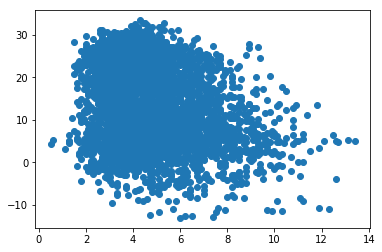

In [34]:
plt.scatter(X["AWND"], y)
plt.savefig("Images/awnd_scatter")

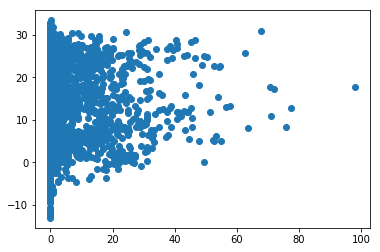

In [35]:
plt.scatter(X["PRCP"], y)
plt.savefig("Images/prcp_scatter")

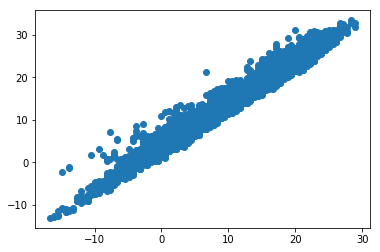

In [36]:
plt.scatter(X["TMIN"], y)
plt.savefig("Images/tmin_scatter")

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=324)

In [38]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

In [39]:
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.98915956168683
Testing Score: 0.989804658673403


In [40]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error

predictions = model.predict(X_test)
MSE = mean_squared_error(y_test, predictions)
MSE_2 = median_absolute_error(y_test, predictions)
MSE_3 = mean_absolute_error(y_test, predictions)

print(f"Mean Squared Error: {MSE}")
print(f"Mean Absolute Error: {MSE_3}")
print(f"Median Absolute Error: {MSE_2}")

Mean Squared Error: 0.9778535760641253
Mean Absolute Error: 0.7624302627397516
Median Absolute Error: 0.6143736330146954


# Decision Tree Classifier

In [41]:
t_avg_mean = y.mean()
print(f"Mean of Average Temperatures is {t_avg_mean}")

Mean of Average Temperatures is 14.108507386653082


In [42]:
t_avg_temp = data_columns["TAVG"] - t_avg_mean
data_columns["TAVG_variation_from mean"] = t_avg_temp
data_columns

C:\Users\AU0006AU\AppData\Local\Continuum\anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,DATE,AWND,PRCP,TAVG,TMAX,TMIN,TAVG_variation_from mean
3624,2016-06-01,3.8,0.0,24.4,28.3,18.3,10.291493
3625,2016-06-02,4.7,0.0,20.5,23.3,16.7,6.391493
3626,2016-06-03,3.1,0.5,19.1,22.2,17.2,4.991493
3627,2016-06-04,2.9,6.9,22.7,28.3,18.9,8.591493
3628,2016-06-05,3.8,17.0,20.7,23.3,19.4,6.591493
...,...,...,...,...,...,...,...
74923,2019-12-27,3.6,0.0,8.7,11.1,6.7,-5.408507
74924,2019-12-28,3.8,0.0,8.1,11.1,2.8,-6.008507
74925,2019-12-29,2.9,9.1,5.0,6.7,0.6,-9.108507
74926,2019-12-30,8.4,12.7,5.6,6.7,3.3,-8.508507


In [43]:
data_columns.loc[data_columns["TAVG_variation_from mean"] > 0, "High(1)_Low(0)_temp"] = 1
data_columns.loc[data_columns["TAVG_variation_from mean"] < 0, "High(1)_Low(0)_temp"] = 0
data_columns

C:\Users\AU0006AU\AppData\Local\Continuum\anaconda3\envs\pythondata\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\AU0006AU\AppData\Local\Continuum\anaconda3\envs\pythondata\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,DATE,AWND,PRCP,TAVG,TMAX,TMIN,TAVG_variation_from mean,High(1)_Low(0)_temp
3624,2016-06-01,3.8,0.0,24.4,28.3,18.3,10.291493,1.0
3625,2016-06-02,4.7,0.0,20.5,23.3,16.7,6.391493,1.0
3626,2016-06-03,3.1,0.5,19.1,22.2,17.2,4.991493,1.0
3627,2016-06-04,2.9,6.9,22.7,28.3,18.9,8.591493,1.0
3628,2016-06-05,3.8,17.0,20.7,23.3,19.4,6.591493,1.0
...,...,...,...,...,...,...,...,...
74923,2019-12-27,3.6,0.0,8.7,11.1,6.7,-5.408507,0.0
74924,2019-12-28,3.8,0.0,8.1,11.1,2.8,-6.008507,0.0
74925,2019-12-29,2.9,9.1,5.0,6.7,0.6,-9.108507,0.0
74926,2019-12-30,8.4,12.7,5.6,6.7,3.3,-8.508507,0.0


In [44]:
target = data_columns["High(1)_Low(0)_temp"]
target_names = ["High", "Low"]

In [45]:
feature_names = X.columns
X.head()

,AWND,PRCP,TMAX,TMIN
3624,3.8,0.0,28.3,18.3
3625,4.7,0.0,23.3,16.7
3626,3.1,0.5,22.2,17.2
3627,2.9,6.9,28.3,18.9
3628,3.8,17.0,23.3,19.4


In [46]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X, target, random_state=42)

In [47]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X2_train, y2_train)
clf.score(X2_test, y2_test)

0.9745417515274949

In [48]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X2_train, y2_train)
rf.score(X2_test, y2_test)

0.9806517311608961

In [49]:
feature_priority = sorted(zip(rf.feature_importances_, feature_names), reverse=True)
feature_priority

[(0.5381693419018206, 'TMIN'),
 (0.41059855938002665, 'TMAX'),
 (0.037875874283631886, 'AWND'),
 (0.013356224434520829, 'PRCP')]

In [50]:
tmin = feature_priority[0][0]
tmax = feature_priority[1][0]
awnd = feature_priority[2][0]
prcp = feature_priority[3][0]

In [51]:
df = pd.DataFrame({
    "Parameter": ["Min Temperature", "Max Temperature", "Wind Speed", "Precipitation"],
    "Probability": [tmin, tmax, awnd, prcp]
})
df

,Parameter,Probability
0,Min Temperature,0.538169
1,Max Temperature,0.410599
2,Wind Speed,0.037876
3,Precipitation,0.013356


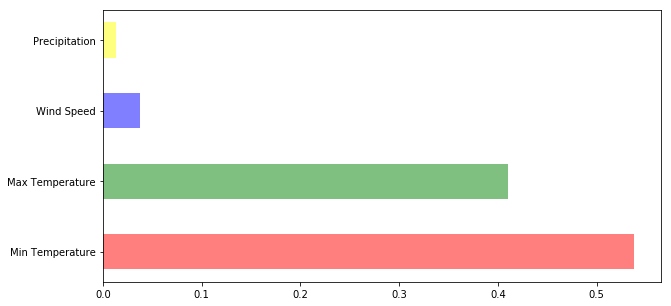

In [59]:
color = ['red', 'green', 'blue', 'yellow']
plt.rcParams["figure.figsize"] = (10, 5)
plt.barh(y=df["Parameter"], width=df["Probability"], height=0.5, align='center', color=color, alpha=0.5)
plt.savefig("Images/tree_barh")